This notebook minning information of player.

In [2]:
#PACKAGE
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

# 字典格式：{ player_name: set of game sites }
player_games = {}

for i in range(1, 301):
    filename = f'Filter_CSV/180+2/chunk_{i}.csv'
    db = pd.read_csv(filename)

    for idx, row in db.iterrows():
        white_player = row['White']
        black_player = row['Black']
        site = row['Site']

        # 儲存白方對局
        if white_player not in player_games:
            player_games[white_player] = set()
        player_games[white_player].add(site)

        # 儲存黑方對局
        if black_player not in player_games:
            player_games[black_player] = set()
        player_games[black_player].add(site)

# 將玩家名字字母排序
sorted_players = sorted(player_games.keys())

# 建立一個排序後的清單，包含玩家名字與對局列表
sorted_player_data = [(player, player_games[player]) for player in sorted_players]

# 印出前幾個玩家看看結果（可選）
for player, games in sorted_player_data[:10]:
    print(f"{player}: {len(games)} games")


2007gabor: 12 games
A-AE: 19 games
A-Dela: 4 games
A-K-11: 3 games
A-M-S-007: 3 games
A-Mesaad: 1 games
A-abdo_abbas-2006: 18 games
A-j-pehecki-lybly51: 19 games
A-lexo: 3 games
A011528717: 4 games


In [6]:
import pandas as pd

# 字典格式：{ player_name: set of game sites }
player_games = {}

for i in range(1, 301):
    filename = f'Filter_CSV/180+2/chunk_{i}.csv'
    db = pd.read_csv(filename)

    for idx, row in db.iterrows():
        white_player = row['White']
        black_player = row['Black']
        site = row['Site']

        # 白方
        if white_player not in player_games:
            player_games[white_player] = set()
        player_games[white_player].add(site)

        # 黑方
        if black_player not in player_games:
            player_games[black_player] = set()
        player_games[black_player].add(site)

# 根據對局數排序（由多到少）
sorted_player_data = sorted(player_games.items(), key=lambda item: len(item[1]), reverse=True)

# 印出前幾名看看
for player, games in sorted_player_data[:10]:
    print(f"{player}: {len(games)} games")


babyfork: 202 games
shalapayuliy: 165 games
KAInov: 152 games
CactusCream: 142 games
jmanette411: 141 games
MehdiTayebi1352: 134 games
Anonimous1820: 132 games
EN2MA: 130 games
Francesco0903: 124 games
abja40: 123 games


In [8]:
import pandas as pd

player_data = {}

def get_result_tag(result, is_white):
    if result == '1-0':
        return 'win' if is_white else 'loss'
    elif result == '0-1':
        return 'loss' if is_white else 'win'
    elif result == '1/2-1/2':
        return 'draw'
    return 'unknown'

def update_player(player, elo, site, eco, result, is_white):
    if player not in player_data:
        player_data[player] = {
            "games": {},
            "elos": [],
        }
    
    color = "white" if is_white else "black"
    result_tag = get_result_tag(result, is_white)
    
    # 記錄這場對局
    player_data[player]["games"][site] = {
        "elo": int(elo) if pd.notna(elo) else None,
        "eco": eco if pd.notna(eco) else None,
        "result": result_tag,
        "color": color
    }

    if pd.notna(elo):
        player_data[player]["elos"].append(int(elo))

# 處理所有 chunk
for i in range(1, 301):
    filename = f'Filter_CSV/180+2/chunk_{i}.csv'
    db = pd.read_csv(filename)

    for _, row in db.iterrows():
        site = row['Site']
        result = row['Result']
        eco = row['ECO']
        white_player = row['White']
        black_player = row['Black']
        white_elo = row['WhiteElo']
        black_elo = row['BlackElo']

        update_player(white_player, white_elo, site, eco, result, is_white=True)
        update_player(black_player, black_elo, site, eco, result, is_white=False)

# 顯示其中一位玩家的對局細節
sample_player = list(player_data.keys())[0]
print(f"\nSample player: {sample_player}")
for site, info in list(player_data[sample_player]["games"].items())[:5]:
    print(f"  Site: {site}, Result: {info['result']}, Color: {info['color']}, ECO: {info['eco']}, Elo: {info['elo']}")



Sample player: BlinkyGaladrigal
  Site: https://lichess.org/wTFwL1r4, Result: draw, Color: white, ECO: A10, Elo: 1967
  Site: https://lichess.org/H7fRm0sa, Result: draw, Color: black, ECO: C55, Elo: 1968
  Site: https://lichess.org/oSZGiYlu, Result: win, Color: white, ECO: A10, Elo: 1965
  Site: https://lichess.org/T1ii3RjQ, Result: loss, Color: black, ECO: D32, Elo: 1975
  Site: https://lichess.org/YGWOMP7U, Result: loss, Color: white, ECO: A27, Elo: 1963


In [14]:
import json
import os

# 確保資料夾存在
output_folder = "Players_mining"
os.makedirs(output_folder, exist_ok=True)

# 輸出為 JSON 格式（包含所有對局細節）
with open(os.path.join(output_folder, "players_data.json"), "w", encoding='utf-8') as f:
    json.dump(player_data, f, indent=2, ensure_ascii=False)

print("✅ 玩家資料已儲存為 JSON：Players_mining/players_data.json")


✅ 玩家資料已儲存為 JSON：Players_mining/players_data.json


In [16]:
import pandas as pd

summary = []
for player, data in player_data.items():
    game_count = len(data["games"])
    avg_elo = sum(data["elos"]) / len(data["elos"]) if data["elos"] else 0
    wins = sum(1 for g in data["games"].values() if g["result"] == "win")
    losses = sum(1 for g in data["games"].values() if g["result"] == "loss")
    draws = sum(1 for g in data["games"].values() if g["result"] == "draw")
    
    summary.append({
        "Player": player,
        "Games": game_count,
        "AvgElo": round(avg_elo, 1),
        "Wins": wins,
        "Losses": losses,
        "Draws": draws
    })

# 轉為 DataFrame 並儲存為 CSV
summary_df = pd.DataFrame(summary).sort_values(by="Games", ascending=False)
summary_df.to_csv(os.path.join(output_folder, "players_summary.csv"), index=False)

print("✅ 玩家摘要已儲存為 CSV：Players_mining/players_summary.csv")


✅ 玩家摘要已儲存為 CSV：Players_mining/players_summary.csv


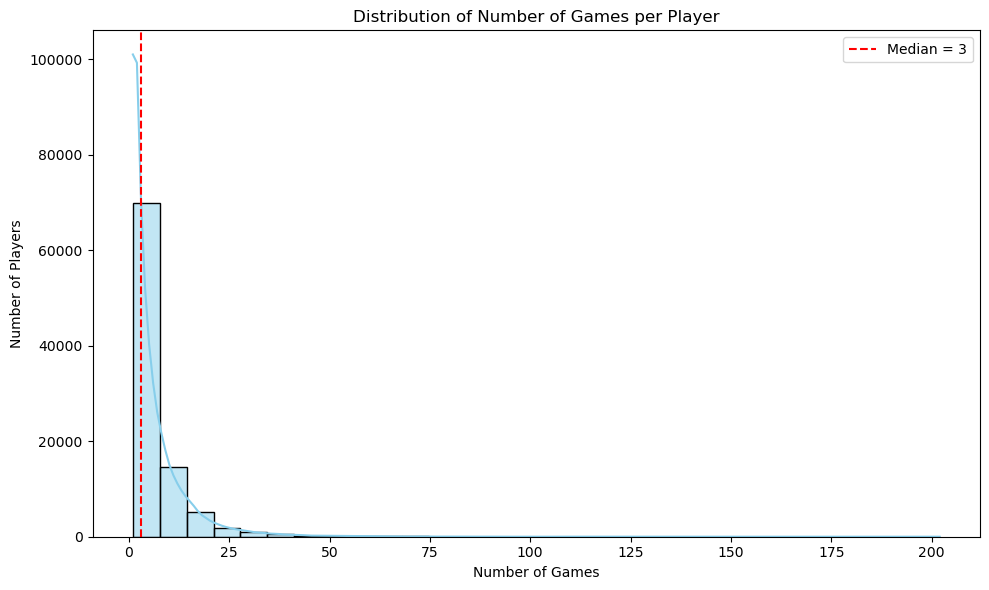

3.0

In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 讀取玩家資料
with open("Players_mining/players_data.json", "r", encoding="utf-8") as f:
    player_data = json.load(f)

# 統計每位玩家的對局數
player_game_counts = [len(info["games"]) for info in player_data.values()]

# 計算中位數
median_games = pd.Series(player_game_counts).median()

# 畫出分佈圖
plt.figure(figsize=(10, 6))
sns.histplot(player_game_counts, bins=30, kde=True, color="skyblue")
plt.axvline(median_games, color='red', linestyle='--', label=f'Median = {median_games:.0f}')
plt.title("Distribution of Number of Games per Player")
plt.xlabel("Number of Games")
plt.ylabel("Number of Players")
plt.legend()
plt.tight_layout()
plt.show()

median_games


In [26]:
import json

# 重新載入玩家資料
with open("Players_mining/players_data.json", "r", encoding="utf-8") as f:
    player_data = json.load(f)

# 計算對局數
game_counts = [len(info["games"]) for info in player_data.values()]

# 統計大於 50 局的玩家數
players_over_20 = sum(1 for count in game_counts if count > 20)

# 總玩家數
total_players = len(game_counts)

# 計算比例
ratio_over_20 = players_over_20 / total_players

players_over_20, total_players, ratio_over_20


(4664, 93935, 0.04965135466013733)

In [32]:
import json

# 重新載入玩家資料
with open("Players_mining/players_data.json", "r", encoding="utf-8") as f:
    player_data = json.load(f)

# 計算對局數
game_counts = [len(info["games"]) for info in player_data.values()]

# 統計小於 5 局的玩家數
players_below_5 = sum(1 for count in game_counts if count <=5)
# 統計小於 10 局的玩家數
players_below_10 = sum(1 for count in game_counts if count <=10)

# 總玩家數
total_players = len(game_counts)

# 計算比例
ratio_below_5 = players_below_5 / total_players

print(players_below_5, total_players, ratio_below_5)

ratio_below_10 = players_below_10 / total_players

print(players_below_10, total_players, ratio_below_10)


61342 93935 0.6530260286368234
78206 93935 0.8325544259328259
